In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

pd.options.display.max_columns = None

In [2]:
#Import Main Table
MAIN_MASTER = pd.read_excel('Data Thailand HR.xlsx','TH workforce')

In [3]:
#Import Entry Date
ENTRY_MASTER = pd.read_excel('Data Thailand HR.xlsx','Hiring date')

In [4]:
#Import Ed Allowance
EDU_ALLOW_MASTER = pd.read_excel('Data Thailand HR.xlsx','Education allowance')

In [5]:
#Import House Loan
HOUSE_MASTER = pd.read_excel('Data Thailand HR.xlsx','Housing Loan')

In [6]:
#Import Education
EDU_MASTER = pd.read_excel('Data Thailand HR.xlsx','Education')

In [7]:
#Import Vacation
VAC_MASTER = pd.read_excel('Data Thailand HR.xlsx','Absence')

*****************************************************************************************************

In [8]:
MAIN = MAIN_MASTER.copy()
MAIN.set_index('Serial Number', inplace=True)

In [9]:
ENTRY = ENTRY_MASTER.copy()
ENTRY.set_index('Serial Number', inplace=True)

In [10]:
EDU_ALLOW = EDU_ALLOW_MASTER.copy()
EDU_ALLOW.set_index('Serial Number', inplace=True)

In [11]:
HOUSE = HOUSE_MASTER.copy()
HOUSE.set_index('Serial Number', inplace=True)

In [12]:
EDU = EDU_MASTER.copy()
#EDU.set_index('Serial Number', inplace=True)

In [13]:
VAC = VAC_MASTER.copy()

In [14]:
MAIN.head()

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status,Employment Status Text,Chief Designation,A&D Designated Position,Corp Hierarchy Division Code (L0),Corp Hierarchy Division Text (L0),Corp Hierarchy Function Code (L1),Corp Hierarchy Function Text (L1),Corp Hierarchy Sub-Function Code (L2),Corp Hierarchy Sub-Function Text (L2),Corp Hierarchy Department Code (L3),Corp Hierarchy Department Text (L3),Corp Hierarchy Sub-Department Code (L4),Corp Hierarchy Sub-Department Text (L4),Corp Hierarchy Section Code (L5),Corp Hierarchy Section Text (L5),Career Steward (IT9604),Career Steward Text (IT9604),Home Company Code (IT0001),Company Code Name,Employee Job Type Code,Employee Job Type Text,Personnel Area,Personnel Area Text,Personnel Subarea,Personnel Subarea Text,Employee Group Code,Employee Group Text,Employee Sub Group Code,Employee Sub Group Text,Organization Unit Code,Organization Unit Abbreviation,Organization Unit Name,Functional Organization (1F),Functional Organization (1F) Text,Functional Department (1D – IT9504),Functional Department (1D – IT9504) Text,Headcount Grouping,Headcount Grouping Text,Organization Unit 0,Organization Unit 0 Text,Organization Unit 1,Organization Unit 1 Text,Organization Unit 2,Organization Unit 2 Text,Organization Unit 3,Organization Unit 3 Text,Organization Unit 4,Organization Unit 4 Text,Organization Unit 5,Organization Unit 5 Text,Organization Unit 6,Organization Unit 6 Text,Organization Unit 7,Organization Unit 7 Text,Organization Unit 8,Organization Unit 8 Text,Organization Unit 9,Organization Unit 9 Text,Functional Organization Unit 0,Functional Organization Unit 0 Text,Functional Organization Unit 1,Functional Organization Unit 1 Text,Functional Organization Unit 2,Functional Organization Unit 2 Text,Functional Organization Unit 3,Functional Organization Unit 3 Text,Functional Organization Unit 4,Functional Organization Unit 4 Text,Functional Organization Unit 5,Functional Organization Unit 5 Text,Functional Organization Unit 6,Functional Organization Unit 6 Text,Functional Organization Unit 7,Functional Organization Unit 7 Text,Functional Organization Unit 8,Functional Organization Unit 8 Text,Functional Organization Unit 9,Functional Organization Unit 9 Text,Department (OU),Department (OU) Text,Home Cost Center (IT0001),Cost Center Description,Payroll Area,Payroll Area Text,Business Area,Business Area Text,Employee Main Address - City,Employee Main Address - Zip Code,District,Employee Main Address - Country,Work Schedule,Work Schedule Text,Personnel Action Type Code,Personnel Action Text,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,Previous Organization Unit,Previous Organization Abbreviation,Previous Organization Unit Text,Function before withdrawn,BSC Indicator,Outlier - Resigned
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,0,Withdrawn,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,ESSO (Thailand) PCL,NaN,NaN,THHT,HEAD OFFICE ETL,TH00,ETL HeadOffice,1,Regular,I0,MPT-monthly,80000295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1511,NaN,T1,MONTHLY+ADVANCE,NaN,NaN,NaN,NaN,NaN,NaN,NORM,normal,31,LEAVE THE COMPANY,N1,Resignation-Non regretted,11,1998,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,M,3,1942,NaT,0,Withdrawn,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,ESSO (Thailand) PCL,NaN,NaN,THHT,HEAD OFFICE ETL,TH00,ETL HeadOffice,1,Regular,I0,MPT-monthly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1511,NaN,T1,MONTHLY+ADVANCE,NaN,NaN,NaN,NaN,NaN,N

In [15]:
Columns = MAIN.columns.tolist()
Columns

['Supervisor Serial',
 'Gender',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employment Status',
 'Employment Status Text',
 'Chief Designation',
 'A&D Designated Position',
 'Corp Hierarchy Division Code (L0)',
 'Corp Hierarchy Division Text (L0)',
 'Corp Hierarchy Function Code (L1)',
 'Corp Hierarchy Function Text (L1)',
 'Corp Hierarchy Sub-Function Code (L2)',
 'Corp Hierarchy Sub-Function Text (L2)',
 'Corp Hierarchy Department Code (L3)',
 'Corp Hierarchy Department Text (L3)',
 'Corp Hierarchy Sub-Department Code (L4)',
 'Corp Hierarchy Sub-Department Text (L4)',
 'Corp Hierarchy Section Code (L5)',
 'Corp Hierarchy Section Text (L5)',
 'Career Steward (IT9604)',
 'Career Steward Text (IT9604)',
 'Home Company Code (IT0001)',
 'Company Code Name',
 'Employee Job Type Code',
 'Employee Job Type Text',
 'Personnel Area',
 'Personnel Area Text',
 'Personnel Subarea',
 'Personnel Subarea Text',
 'Employee Group Code',
 'Employee Group Text',
 'Employee Sub Group C

In [16]:
DropColumns = [
 'Employment Status',
 'Chief Designation',
 'A&D Designated Position',
 'Corp Hierarchy Division Code (L0)',
 'Corp Hierarchy Division Text (L0)',
 'Corp Hierarchy Function Code (L1)',
 'Corp Hierarchy Function Text (L1)',
 'Corp Hierarchy Sub-Function Code (L2)',
 'Corp Hierarchy Sub-Function Text (L2)',
 'Corp Hierarchy Department Code (L3)',
 'Corp Hierarchy Department Text (L3)',
 'Corp Hierarchy Sub-Department Code (L4)',
 'Corp Hierarchy Sub-Department Text (L4)',
 'Corp Hierarchy Section Code (L5)',
 'Corp Hierarchy Section Text (L5)',
 'Career Steward (IT9604)',
 'Career Steward Text (IT9604)',
 'Home Company Code (IT0001)',
 'Company Code Name',
 'Employee Job Type Code',
 'Employee Job Type Text',
 'Personnel Area',
 'Personnel Area Text',
 'Personnel Subarea',
 'Personnel Subarea Text',
 'Employee Group Code',
 'Employee Group Text',
 'Employee Sub Group Code',
 'Organization Unit Code',
 'Organization Unit Abbreviation',
 'Organization Unit Name',
 'Functional Organization (1F)',
 'Functional Organization (1F) Text',
 'Functional Department (1D – IT9504)',
 'Functional Department (1D – IT9504) Text',
 'Headcount Grouping',
 'Headcount Grouping Text',
 'Organization Unit 0',
 'Organization Unit 0 Text',
 'Organization Unit 1',
 'Organization Unit 1 Text',
 'Organization Unit 2',
 'Organization Unit 2 Text',
 'Organization Unit 3',
 'Organization Unit 3 Text',
 'Organization Unit 4',
 'Organization Unit 4 Text',
 'Organization Unit 5',
 'Organization Unit 5 Text',
 'Organization Unit 6',
 'Organization Unit 6 Text',
 'Organization Unit 7',
 'Organization Unit 7 Text',
 'Organization Unit 8',
 'Organization Unit 8 Text',
 'Organization Unit 9',
 'Organization Unit 9 Text',
 'Functional Organization Unit 0',
 'Functional Organization Unit 0 Text',
 'Functional Organization Unit 1',
 'Functional Organization Unit 1 Text',
 'Functional Organization Unit 2',
 'Functional Organization Unit 2 Text',
 'Functional Organization Unit 3',
 'Functional Organization Unit 3 Text',
 'Functional Organization Unit 4',
 'Functional Organization Unit 4 Text',
 'Functional Organization Unit 5',
 'Functional Organization Unit 5 Text',
 'Functional Organization Unit 6',
 'Functional Organization Unit 6 Text',
 'Functional Organization Unit 7',
 'Functional Organization Unit 7 Text',
 'Functional Organization Unit 8',
 'Functional Organization Unit 8 Text',
 'Functional Organization Unit 9',
 'Functional Organization Unit 9 Text',
 'Department (OU)',
 'Department (OU) Text',
 'Home Cost Center (IT0001)',
 'Cost Center Description',
 'Payroll Area',
 'Payroll Area Text',
 'Business Area',
 'Business Area Text',
 'Employee Main Address - City',
 'Employee Main Address - Zip Code',
 'District',
 'Employee Main Address - Country',
 'Work Schedule',
 'Work Schedule Text',
 'Previous Organization Unit',
 'Previous Organization Abbreviation',
 'Previous Organization Unit Text',
 'Function before withdrawn',
 'Outlier - Resigned']

MAIN.drop(DropColumns, axis=1, inplace=True)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel Action Type Code,Personnel Action Text,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,BSC Indicator
Serial Number,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N1,Resignation-Non regretted,11,1998,NaN
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,5,1998,NaN
3,NaN,M,6,1938,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,6,1998,NaN
4,NaN,F,1,1942,1961-12-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,2000,NaN
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,2,2000,NaN
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,1999,NaN
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,1,1998,NaN


In [17]:
MAIN.dtypes

Supervisor Serial                             float64
Gender                                         object
Month of Birth                                  int64
Year of Birth                                   int64
Tech Date of Entry                     datetime64[ns]
Employment Status Text                         object
Employee Sub Group Text                        object
Personnel Action Type Code                     object
Personnel Action Text                          object
Personnel Action Reason Code                   object
Personnel Action Reason Description            object
Personnel action - Month                        int64
Personnel action - Year                         int64
BSC Indicator                                  object
dtype: object

## Define target - Resigned

In [18]:
MAIN.loc[:,'Action Reason'] = MAIN['Personnel Action Type Code'].astype('str')+'-'+ MAIN['Personnel Action Text'].astype('str')+' : '+ MAIN['Personnel Action Reason Code'].astype('str')+'-'+ MAIN['Personnel Action Reason Description'].astype('str')

In [19]:
LeaveReason = MAIN['Action Reason'].unique()
sorted(LeaveReason)

['1-ENTRY IN THE COMPANY : 0-Hiring-New position',
 '1-ENTRY IN THE COMPANY : 1-Hiring-Existing position',
 '11-INTERNAL MOVE : 70-Change Company/New Pos.',
 '11-INTERNAL MOVE : 71-Change Company/Exist.Pos.',
 '11-INTERNAL MOVE : 72-Change Pers.Area/New Pos.',
 '11-INTERNAL MOVE : 73-Change Pers.Area/Exist. Pos.',
 '11-INTERNAL MOVE : 74-Change Organization/New Pos.',
 '11-INTERNAL MOVE : 75-Change Organization/Exist Pos.',
 '11-INTERNAL MOVE : 76-Change Position/New Pos.',
 '11-INTERNAL MOVE : 77-Change Position/Exist Pos.',
 '11-INTERNAL MOVE : 82-Reorganization',
 '11-INTERNAL MOVE : ZZ-Technical upload',
 '15-RETURN TO HOME COMPANY : C0-Return home Cy-new position',
 '15-RETURN TO HOME COMPANY : C1-Return home Cy- Existing pos.',
 '21-CHANGE EMPLOYEE SITUATION : E6-Temporary to Regular',
 '21-CHANGE EMPLOYEE SITUATION : G0-Promotion (change in position)',
 '21-CHANGE EMPLOYEE SITUATION : G1-Reclassification',
 '3-RE-ENTRY IN THE COMPANY : 0-Hiring-New position',
 '3-RE-ENTRY IN THE

In [20]:
DEF_RESIGNED = [
    '31-LEAVE THE COMPANY : N0-Resignation-Regretted',
    '31-LEAVE THE COMPANY : N1-Resignation-Non regretted',
    '31-LEAVE THE COMPANY : N2-Resignation during Prob.Period',
    '31-LEAVE THE COMPANY : N4-Resignation - Just Cause',
]

MAIN.loc[:, 'Resigned'] = 0
MAIN.loc[MAIN['Action Reason'].isin(DEF_RESIGNED), 'Resigned'] = 1

MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel Action Type Code,Personnel Action Text,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,BSC Indicator,Action Reason,Resigned
Serial Number,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N1,Resignation-Non regretted,11,1998,NaN,31-LEAVE THE COMPANY : N1-Resignation-Non regr...,1
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,5,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
3,NaN,M,6,1938,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,6,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
4,NaN,F,1,1942,1961-12-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,2,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,1,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0


In [21]:
#Drop records of Withdrawn : Migration Upload
UNIDENTIFY = [
    'Y4-Withdrawn Chg. (Migration) : ZZ-Migration Upload',
]

DROP_RECORDS = MAIN[MAIN['Action Reason'].isin(UNIDENTIFY)].index.tolist()
len(DROP_RECORDS)

210

In [22]:
MAIN.drop(MAIN.index[DROP_RECORDS], inplace=True)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel Action Type Code,Personnel Action Text,Personnel Action Reason Code,Personnel Action Reason Description,Personnel action - Month,Personnel action - Year,BSC Indicator,Action Reason,Resigned
Serial Number,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N1,Resignation-Non regretted,11,1998,NaN,31-LEAVE THE COMPANY : N1-Resignation-Non regr...,1
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,5,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,3,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,2,2000,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,1,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,Y4,Withdrawn Chg. (Migration),ZZ,Migration Upload,1,1998,NaN,Y4-Withdrawn Chg. (Migration) : ZZ-Migration U...,0
11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,12,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1
12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,31,LEAVE THE COMPANY,N0,Resignation-Regretted,4,1999,NaN,31-LEAVE THE COMPANY : N0-Resignation-Regretted,1


In [23]:
DropColumns = [
'Personnel Action Type Code',
'Personnel Action Text',
'Personnel Action Reason Code',
'Personnel Action Reason Description',
'Action Reason']

MAIN.drop(DropColumns, axis=1, inplace=True)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employment Status Text,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned
Serial Number,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,Withdrawn,MPT-monthly,11,1998,NaN,1
2,NaN,M,3,1942,NaT,Withdrawn,MPT-monthly,5,1998,NaN,0
5,NaN,M,2,1939,1961-02-01,Withdrawn,MPT-monthly,3,2000,NaN,1
6,346.0,M,12,1939,1962-02-01,Withdrawn,Non-MPT-monthly,1,2000,NaN,1
7,NaN,M,1,1939,1962-03-01,Withdrawn,MPT-monthly,2,2000,NaN,1
8,27.0,M,5,1939,1962-03-01,Withdrawn,MPT-monthly,1,1999,NaN,1
9,NaN,M,1,1937,NaT,Withdrawn,Non-MPT-monthly,1,1998,NaN,0
11,88.0,M,11,1939,1962-04-01,Withdrawn,MPT-monthly,12,1999,NaN,1
12,NaN,M,12,1945,1964-01-01,Withdrawn,MPT-monthly,4,1999,NaN,1


# Placeholder to handle outlier

In [24]:
#Unusual resigned spike in Jun-Jul 1999, Apr 2000, Jan 2001, Jan 2002 - total 200 ppl.
#Should we treat these cases as latoff?

UnusualLeave = pd.DataFrame({'Serial Number':[
24, 31, 38, 41, 42, 45, 54, 87, 95, 97, 99, 107, 113, 114, 123, 128, 129, 132, 133, 143, 163, 165, 171, 172, 179, 181, 191, 198, 199, 214, 215, 225, 228, 235, 236, 237, 245, 247, 252, 253, 255, 259, 260, 264, 268, 276, 278, 284, 290, 291, 302, 304, 306, 307, 308, 309, 310, 315, 321, 322, 327, 328, 330, 333, 334, 335, 383, 384, 385, 393, 396, 397, 411, 412, 444, 458, 468, 477, 492, 513, 514, 558, 562, 564, 584, 693, 730, 733, 740, 742, 747, 757, 790, 791, 793, 883, 967, 973, 975, 1003, 1004, 1005, 1006, 1007, 1039, 1060, 1225, 1226, 1227, 1240, 1326, 1342, 1344, 1352, 1357, 1360, 1361, 1362, 1363, 1372, 1377, 1429, 1448, 1456, 1458, 1461, 1464, 1472, 1473, 1474, 1490, 1539, 1541, 1559, 1562, 1563, 1565, 1567, 1568, 1569, 1570, 1571, 1573, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1640, 1642, 1643, 1644, 1645, 1658, 1738, 1774, 1820, 1822, 1823, 1828, 1829, 1830, 1831, 1832, 1835, 1836, 1837, 1838, 1841, 1842, 1843, 1844, 1847, 1848, 1849, 1851, 1852, 1853, 1854, 1855, 1856, 1858, 1860, 1861, 1862, 1863, 1864, 1865, 1867, 1868, 1873, 1874, 1875
]})

UnusualLeave

,Serial Number
0,24
1,31
2,38
3,41
4,42
5,45
6,54
7,87
8,95
9,97


In [25]:
MAIN.loc[MAIN.index.isin(UnusualLeave['Serial Number']), 'Resigned'] = 0

MAIN[MAIN.index.isin(UnusualLeave['Serial Number'])]['Resigned']

Serial Number
31      0
41      0
42      0
45      0
54      0
87      0
97      0
99      0
107     0
113     0
114     0
123     0
128     0
129     0
133     0
143     0
163     0
165     0
171     0
172     0
179     0
181     0
191     0
198     0
199     0
214     0
215     0
225     0
235     0
236     0
       ..
1832    0
1835    0
1836    0
1837    0
1838    0
1841    0
1842    0
1843    0
1844    0
1847    0
1848    0
1849    0
1851    0
1852    0
1853    0
1854    0
1855    0
1856    0
1858    0
1860    0
1861    0
1862    0
1863    0
1864    0
1865    0
1867    0
1868    0
1873    0
1874    0
1875    0
Name: Resigned, Length: 175, dtype: int64

## Reference Date

In [26]:
RefDate = '2017-12-31'
MAIN['Reference Date'] = pd.to_datetime(RefDate)

In [27]:
MAIN['Personnel action - Year'] = MAIN['Personnel action - Year'].astype('str')
MAIN['Personnel action - Month'] = MAIN['Personnel action - Month'].astype('str')
MAIN['Last Action Date'] = pd.to_datetime(MAIN['Personnel action - Year']+'-'+MAIN['Personnel action - Month']+'-01')

In [28]:
MAIN['Year of Birth'] = MAIN['Year of Birth'].astype('str')
MAIN['Month of Birth'] = MAIN['Month of Birth'].astype('str')
MAIN['Birth Date'] = pd.to_datetime(MAIN['Year of Birth']+'-'+MAIN['Month of Birth']+'-01')

In [29]:
#MAIN.loc[(MAIN['Employment Status Text'] == 'Withdrawn') & (MAIN['Resigned'] == 0),:]

In [30]:
MAIN['Action Date'] = MAIN['Reference Date'] 
MAIN.loc[MAIN['Employment Status Text'] == 'Withdrawn','Action Date'] = MAIN['Last Action Date']

DropColumns = [
'Employment Status Text']

MAIN.drop(DropColumns, axis=1, inplace=True)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date
Serial Number,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,MPT-monthly,11,1998,NaN,1,2017-12-31,1998-11-01,1938-10-01,1998-11-01
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,NaN,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,NaN,1,2017-12-31,2000-03-01,1939-02-01,2000-03-01
6,346.0,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,NaN,1,2017-12-31,2000-01-01,1939-12-01,2000-01-01
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,NaN,1,2017-12-31,2000-02-01,1939-01-01,2000-02-01
8,27.0,M,5,1939,1962-03-01,MPT-monthly,1,1999,NaN,1,2017-12-31,1999-01-01,1939-05-01,1999-01-01
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,NaN,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01
11,88.0,M,11,1939,1962-04-01,MPT-monthly,12,1999,NaN,1,2017-12-31,1999-12-01,1939-11-01,1999-12-01
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,NaN,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01


In [31]:
#Set Max Entry Date
ENTRY.drop(['End Date (0000)','Action type (0000)','Action type (0000) Text','Reason for Action text (0000)'], axis=1, inplace=True)
ENTRY = ENTRY.groupby('Serial Number').agg('max')
MAIN['Max Entry Date'] = ENTRY['Start Date (0000)']

In [32]:
#Check multiple enrty
ENTRYCNT = ENTRY_MASTER.groupby('Serial Number').agg('count')
ENTRYCNT.drop(['End Date (0000)','Action type (0000)','Action type (0000) Text','Reason for Action text (0000)'], axis=1, inplace=True)
ENTRYCNT['Is Re-Entry'] = 0
ENTRYCNT.loc[ENTRYCNT['Start Date (0000)']> 1,'Is Re-Entry'] = 1
MAIN['Is Re-Entry'] = ENTRYCNT['Is Re-Entry']

In [33]:
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry
Serial Number,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,MPT-monthly,11,1998,NaN,1,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,NaN,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,NaN,1,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0
6,346.0,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,NaN,1,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,NaN,1,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0
8,27.0,M,5,1939,1962-03-01,MPT-monthly,1,1999,NaN,1,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,NaN,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0
11,88.0,M,11,1939,1962-04-01,MPT-monthly,12,1999,NaN,1,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,NaN,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0


In [34]:
#How to handle the case when Entry date is greater than Tech Date of Entry?

#MAIN.loc[:,'Entry Date'] = MAIN['Max Entry Date'] 
#MAIN.loc[MAIN['Tech Date of Entry'] > MAIN['Max Entry Date'],'Entry Date'] = MAIN['Tech Date of Entry']
MAIN.loc[:,'Entry Date'] = MAIN['Max Entry Date'] 
MAIN.loc[MAIN['Tech Date of Entry'].notnull(),'Entry Date'] = MAIN['Tech Date of Entry']

In [35]:
#How about Last Entry Date is greater than Tech Date of Entry more than 6 months?
DateDiff = MAIN.loc[(MAIN['Max Entry Date'] > MAIN['Tech Date of Entry']), ['Max Entry Date','Tech Date of Entry']]
DateDiff.loc[:,'DateDiff'] = MAIN['Max Entry Date'] - MAIN['Tech Date of Entry']

DateDiff[DateDiff['DateDiff']>datetime.timedelta(days=180)].sort_values("DateDiff",ascending=False)

,Max Entry Date,Tech Date of Entry,DateDiff
Serial Number,,,
694,2017-03-01,1991-09-01,9313 days
794,2017-01-01,1993-01-01,8766 days
1557,2011-02-01,1989-05-01,7946 days
479,2008-03-04,1987-05-01,7613 days
615,2010-09-06,1993-07-01,6276 days
475,1985-12-02,1970-01-01,5814 days
1529,2009-01-01,1996-12-01,4414 days
1080,2004-10-15,1993-10-01,4032 days
2883,2016-03-01,2007-02-01,3316 days


In [36]:
DateDiff = MAIN.loc[(MAIN['Entry Date'] > MAIN['Action Date']), ['Entry Date','Action Date']]
DateDiff.loc[:,'DateDiff'] = MAIN['Entry Date'] - MAIN['Action Date']

DateDiff[DateDiff['DateDiff']>datetime.timedelta(days=1)].sort_values("DateDiff",ascending=False)

,Entry Date,Action Date,DateDiff
Serial Number,,,
3491,2018-01-01,2010-06-01,2771 days


In [37]:
#Experience
#MAIN['Exp at Action'] = pd.to_numeric((MAIN['Action Date']-MAIN['Entry Date'])/(60*60*24*1000000000), downcast='float')/365
MAIN['Exp at Action'] = (MAIN['Action Date']-MAIN['Entry Date'])

In [38]:
MAIN.loc[:,'Exp at Action'] = MAIN['Exp at Action']/np.timedelta64(1, 'Y')
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action
Serial Number,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,MPT-monthly,11,1998,NaN,1,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,NaN,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,NaN,1,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147
6,346.0,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,NaN,1,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,NaN,1,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750
8,27.0,M,5,1939,1962-03-01,MPT-monthly,1,1999,NaN,1,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,NaN,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328
11,88.0,M,11,1939,1962-04-01,MPT-monthly,12,1999,NaN,1,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,NaN,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815


In [39]:
MAIN['Exp at Action'].sort_values()

Serial Number
3491    -7.586740
5038    -0.002738
3447     0.000000
2110     0.000000
4953     0.000000
3342     0.000000
2210     0.000000
4697     0.000000
3179     0.000000
2299     0.000000
2310     0.000000
2318     0.000000
3146     0.000000
3113     0.000000
3095     0.000000
2465     0.000000
2642     0.000000
2769     0.000000
2312     0.000000
4647     0.000000
4987     0.000000
2025     0.000000
4384     0.000000
4321     0.000000
4279     0.000000
4089     0.000000
4032     0.000000
3989     0.000000
1641     0.000000
4049     0.000000
          ...    
135     37.167088
243     37.246487
68      37.416237
299     37.418975
295     37.503850
297     37.503850
182     37.588725
298     37.588725
77      37.668125
11      37.668125
269     37.747524
6       37.914536
7       37.922750
34      38.002149
74      38.248561
2       38.330698
281     38.336174
341     38.338912
288     38.834473
47      38.834473
5       39.078147
208     39.335510
1670    39.417647
134     40.085

In [40]:
MAIN.loc[3491,:]

Supervisor Serial                          2624
Gender                                        F
Month of Birth                                5
Year of Birth                              1980
Tech Date of Entry          2018-01-01 00:00:00
Employee Sub Group Text             MPT-monthly
Personnel action - Month                      6
Personnel action - Year                    2010
BSC Indicator                               NaN
Resigned                                      1
Reference Date              2017-12-31 00:00:00
Last Action Date            2010-06-01 00:00:00
Birth Date                  1980-05-01 00:00:00
Action Date                 2010-06-01 00:00:00
Max Entry Date              2018-01-15 00:00:00
Is Re-Entry                                   1
Entry Date                  2018-01-01 00:00:00
Exp at Action                          -7.58674
Name: 3491, dtype: object

In [41]:
MAIN.drop(3491, inplace=True)

In [42]:
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action
Serial Number,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,MPT-monthly,11,1998,NaN,1,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,NaN,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,NaN,1,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147
6,346.0,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,NaN,1,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,NaN,1,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750
8,27.0,M,5,1939,1962-03-01,MPT-monthly,1,1999,NaN,1,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,NaN,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328
11,88.0,M,11,1939,1962-04-01,MPT-monthly,12,1999,NaN,1,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,NaN,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815


In [43]:
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action
Serial Number,,,,,,,,,,,,,,,,,,
1,364.0,M,10,1938,1955-02-01,MPT-monthly,11,1998,NaN,1,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,NaN,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,NaN,1,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147
6,346.0,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,NaN,1,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,NaN,1,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750
8,27.0,M,5,1939,1962-03-01,MPT-monthly,1,1999,NaN,1,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,NaN,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328
11,88.0,M,11,1939,1962-04-01,MPT-monthly,12,1999,NaN,1,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,NaN,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815


In [44]:
#Resigned after (age > 55 years & exp > 20 years) == non-resign
CutOffResignAge = 55
CutOffResignExp = 20

MAIN['Age at Action'] = pd.to_numeric((MAIN['Action Date']-MAIN['Birth Date'])/(60*60*24*1000000000), downcast='float')/365
len(MAIN.loc[(MAIN['Resigned'] == 1) & (MAIN['Age at Action']>CutOffResignAge) & (MAIN['Exp at Action']>CutOffResignExp),'Resigned'])

132

In [45]:
MAIN.loc[(MAIN['Resigned'] == 1) & (MAIN['Age at Action']>CutOffResignAge) & (MAIN['Exp at Action']>CutOffResignExp),'Resigned'] = 0

In [46]:
len(MAIN.loc[(MAIN['Resigned'] == 1) & (MAIN['Age at Action']>CutOffResignAge) & (MAIN['Exp at Action']>CutOffResignExp),'Resigned'])

0

In [47]:
MAIN['Is MPT'] = 0
MAIN.loc[MAIN['Employee Sub Group Text']=='MPT-monthly','Is MPT'] = 1

In [48]:
#Set Supervisor dataset
SUP = MAIN[MAIN.index.isin(MAIN['Supervisor Serial'])].copy()

In [49]:
RenameCol = {
    'Supervisor Serial':'Manager Serial',
    'Gender':'SUP Gender',
    'Birth Date':'SUP Birth Date',
    'Action Date':'SUP Action Date',
    'Entry Date':'SUP Entry Date',
    'Exp at Action':'SUP Exp at Action',
    'Age at Action':'SUP Age at Action',
    'Is MPT':'SUP Is MPT',
}
SUP.rename(columns=RenameCol, inplace=True)

In [50]:
SUP.loc[:, 'Supervisor Serial'] = SUP.index

In [51]:
Columns = SUP.columns.tolist()
Columns

['Manager Serial',
 'SUP Gender',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employee Sub Group Text',
 'Personnel action - Month',
 'Personnel action - Year',
 'BSC Indicator',
 'Resigned',
 'Reference Date',
 'Last Action Date',
 'SUP Birth Date',
 'SUP Action Date',
 'Max Entry Date',
 'Is Re-Entry',
 'SUP Entry Date',
 'SUP Exp at Action',
 'SUP Age at Action',
 'SUP Is MPT',
 'Supervisor Serial']

In [52]:
DropColumns = [
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employee Sub Group Text',
 'Personnel action - Month',
 'Personnel action - Year',
 'BSC Indicator',
 'Resigned',
 'Reference Date',
 'Last Action Date',
 'Is Re-Entry',
 'Max Entry Date']

In [53]:
SUP.drop(DropColumns, axis=1, inplace=True)

In [54]:
SUP

,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Supervisor Serial
Serial Number,,,,,,,,,
7,NaN,M,1939-01-01,2000-02-01,1962-03-01,37.922750,61.126026,1,7
27,NaN,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1,27
52,NaN,M,1945-09-01,2003-03-01,1967-03-01,36.000739,57.534248,1,52
55,351.0,M,1940-09-01,2000-10-01,1968-01-01,32.750844,60.123287,1,55
56,487.0,M,1944-05-01,2004-06-01,1968-01-01,36.416901,60.126026,1,56
62,832.0,M,1944-01-01,2004-02-01,1968-01-01,36.085614,60.126026,1,62
72,1071.0,M,1949-02-01,2009-03-01,1968-01-01,41.164432,60.117809,1,72
88,NaN,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1,88
90,400.0,F,1943-02-01,2003-03-01,1967-10-01,35.414827,60.117809,1,90


In [55]:
SUP2 = MAIN[MAIN.index.isin(MAIN['Supervisor Serial'])].copy()
Columns = SUP2.columns.tolist()
Columns

['Supervisor Serial',
 'Gender',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employee Sub Group Text',
 'Personnel action - Month',
 'Personnel action - Year',
 'BSC Indicator',
 'Resigned',
 'Reference Date',
 'Last Action Date',
 'Birth Date',
 'Action Date',
 'Max Entry Date',
 'Is Re-Entry',
 'Entry Date',
 'Exp at Action',
 'Age at Action',
 'Is MPT']

In [56]:
DropColumns = ['Supervisor Serial',
 'Gender',
 'Month of Birth',
 'Year of Birth',
 'Tech Date of Entry',
 'Employee Sub Group Text',                 
 'Personnel action - Month',
 'Personnel action - Year',
 'BSC Indicator',
 'Resigned',
 'Reference Date',
 'Last Action Date',
 'Birth Date',
 'Action Date',
 'Max Entry Date',
 'Is Re-Entry',
 'Entry Date',
 'Exp at Action',
 'Age at Action',
 'Is MPT']

In [57]:
SUP2.drop(DropColumns, axis=1, inplace=True)

In [58]:
SUP2['Is SUP'] = 1

In [59]:
MAIN = MAIN.reset_index().merge(SUP, on='Supervisor Serial', how="left").set_index(MAIN.index.names)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,NaN,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,NaN,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,NaN,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,NaN,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,NaN,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,NaN,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,NaN,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,NaN,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,NaN,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,NaN,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,NaN,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,NaN,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN


In [60]:
MAIN = MAIN.join(SUP2)
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,NaN,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,NaN,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,NaN
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,NaN,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,NaN,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,NaN,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,NaN
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,NaN,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,1.0
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,NaN,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,NaN,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,NaN
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,NaN,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,NaN,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,NaN,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,NaN
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,NaN,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN


In [61]:
MAIN.loc[MAIN['BSC Indicator'].isnull(), 'BSC Indicator'] = 0
MAIN.loc[MAIN['BSC Indicator']=='X', 'BSC Indicator'] = 1
MAIN.loc[:,'BSC Indicator'] = MAIN['BSC Indicator'].astype('int64')
MAIN.loc[MAIN['Manager Serial'].isnull(), 'Manager Serial'] = 0
MAIN.loc[MAIN['SUP Gender'].isnull(), 'SUP Gender'] = 0
MAIN.loc[MAIN['SUP Exp at Action'].isnull(), 'SUP Exp at Action'] = 0
MAIN.loc[MAIN['SUP Age at Action'].isnull(), 'SUP Age at Action'] = 0
MAIN.loc[MAIN['Is SUP'].isnull(), 'Is SUP'] = 0
MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,0,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,0,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,0,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,0,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,0,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,0,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,0,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,0,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,0,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0


In [62]:
#Set Ed Allowance Flag
EDU_ALLOW.drop(['End date','Start date'], axis=1, inplace=True)
EDU_ALLOW = EDU_ALLOW.groupby('Serial Number').agg('count')
EDU_ALLOW['EDU Allowance'] = 1
EDU_ALLOW.drop(['Wage Type'], axis=1, inplace=True)
MAIN = MAIN.join(EDU_ALLOW)

MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,0,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,0,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,0,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,0,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,0,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,0,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,0,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,0,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,0,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN


In [63]:
#Set House Loan Flag
HOUSE.drop(['End date','Start date'], axis=1, inplace=True)
HOUSE = HOUSE.groupby('Serial Number').agg('count')
HOUSE['House Loan'] = 1
HOUSE.drop(['Wage Type'], axis=1, inplace=True)
MAIN = MAIN.join(HOUSE)

MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,0,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN,NaN
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,0,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,0,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,0,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN,NaN
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,0,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN,NaN
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,0,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN,NaN
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,0,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,0,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN,NaN
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,0,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN


In [64]:
#Set Education records
RenameCol = {
    'Start Date (0022)':'Start Date',
    'End Date (0022)':'End Date',
}
EDU.rename(columns=RenameCol, inplace=True)

EDU['Start Date'] = EDU['Start Date'].astype('datetime64[ns]')
EDU['End Date'] = EDU['End Date'].astype('datetime64[ns]')

In [65]:
EDU['Branch of study 1 Text'].unique()

array(['General Studies', 'No Specific Branch', 'Education',
       'Business-Economics', 'Other Degree', 'Finance/Accounting',
       'Business-Admin', 'Engineer-Mechanical', 'Law',
       'Computer Science/IT', 'Mathematics', 'Engineer-Chemical',
       'Technical-Other', 'Metallurgy', 'Engineer-Electrical', 'Chemistry',
       'Engineer-Manufacturing Tech', 'Engineer-Civil', 'Science-Other',
       'Social Studies', 'Languages', 'Business-Marketing',
       'Engineer-Petroleum', 'Marine', 'Medical', 'Engineer-Industrial',
       'Engineer-Other', 'Geophysics', 'Physics', 'Architecture',
       'Psychology', 'Human Resources', 'Business-Other',
       'Engineer-Mechanical Tech', 'Engineer-Chemical Tech', 'Aeronautics',
       'Engineer-Environmental', 'Engineer-Computer', 'Engineer-Safety',
       'Science-Polymers', 'Logistics & Supply', 'Public Affairs',
       'Engineer-Petroleum Tech', 'Business-Commercial', 'Biology',
       'Engineer-Electronics Tech', 'Engineer-Materials',
   

In [66]:
#Set Is STEM column
NONSTEM = [
            'Business-Admin',
            'Business-Commercial',
            'Business-Economics',
            'Business-Marketing',
            'Business-Other',
            'Education',
            'Finance/Accounting',
            'General Studies',
            'Human Resources',
            'Languages',
            'Law',
            'Liberal Arts',
            'Logistics & Supply',
            'Marine',
            'No Degree',
            'No Specific Branch',
            'Other Degree',
            'Psychology',
            'Public Affairs',
            'Social Studies']

EDU.loc[:, 'Is STEM'] = 1
EDU.loc[EDU['Branch of study 1 Text'].isin(NONSTEM), 'Is STEM'] = 0

In [67]:
EDU['Certificate Text'].unique()

array(['Attended', 'Bachelor', 'Diploma', 'Masters', 'MBA', 'Pre-Diploma',
       'MD', 'PhD', 'Other Degree', 'Post-Graduate', 'Attended No Degree',
       'Attended Jr.College', 'Post-Doctorate',
       'Attended High Tech. School', 'Attended High School'], dtype=object)

In [68]:
#Set Degree column
B_DEGREE = ['Bachelor']
M_DEGREE = ['Masters','MBA','MD','Post-Graduate']
PHD_DEGREE = ['PhD','Post-Doctorate']

EDU.loc[:, 'Degree'] = 1
EDU.loc[EDU['Certificate Text'].isin(B_DEGREE), 'Degree'] = 2
EDU.loc[EDU['Certificate Text'].isin(M_DEGREE), 'Degree'] = 3
EDU.loc[EDU['Certificate Text'].isin(PHD_DEGREE), 'Degree'] = 4

In [69]:
EDU.drop(['Institute/location','Branch of study 1 Text','Certificate Text'], axis=1, inplace=True)

In [70]:
#Correct End Date for Bachelor
EDU.loc[(EDU['End Date']> pd.to_datetime(RefDate)) & (EDU['Degree']==2), 'End Date'] = EDU['Start Date'].apply(lambda x: x + pd.DateOffset(years=4))

#Correct End Date for Master
EDU.loc[(EDU['End Date']> pd.to_datetime(RefDate)) & (EDU['Degree']==3), 'End Date'] = EDU['Start Date'].apply(lambda x: x + pd.DateOffset(years=2))

In [71]:
EDU = EDU.groupby('Serial Number').agg('max')

In [72]:
EDU.drop(['Start Date'], axis=1, inplace=True)
RenameCol = {
    'End Date':'Last Grad Date',
    'Degree':'MAX Degree',
}
EDU.rename(columns=RenameCol, inplace=True)
MAIN = MAIN.join(EDU)

MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,0,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,0,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1957-01-01,0.0,1.0
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,0,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1960-03-31,0.0,2.0
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,0,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,0,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN,NaN,1961-08-30,0.0,1.0
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,0,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN,NaN,1961-01-01,0.0,1.0
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,0,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1948-01-01,0.0,1.0
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,0,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN,NaN,1990-03-31,0.0,2.0
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,0,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1963-12-20,0.0,1.0


In [73]:
#VACATION
VAC['Attendance or Absence Type'].unique()

array(['Vacation Leave', 'Birthday Leave', 'Vacation Leave (Half day)',
       'Sick <NC/FP 30 w/d>', 'Civic Duty Leave',
       "Marriage Employee's child", 'Death of brother/sister',
       'Sick <C/FP 30 w/d>', 'Personal Leave (P&NC)',
       'Death immediate Family Mb', 'Personal Leave (P&C)',
       'Paternity Leave', 'Dependent Care Leave', '1st year vacation',
       'Sick <Not count/Full pay>', 'Personal Leave (NP&NC)',
       'Activity of the Union', "Employee's Marriage",
       'Personal Leave (NP&C)', 'Priesthood Leave',
       'Personal Leave 0.5(NP&NC)', 'Extended Child Care Leave',
       'Maternity Leave', 'Maternity Leave (W/O Pay)',
       'Sick <Not count/Half pay>', 'Military Call Up Leave',
       'Sick (Count/Full pay>', 'Personal Leave 0.5 (NP&C)',
       'Sick (Count/Half pay>', 'Travel Leave', 'Educational Leave',
       'Sick <Not count/W/O pay>'], dtype=object)

In [74]:
#Set Vacation type
VAC_DependentCare = ["Dependent Care Leave",
"Extended Child Care Leave",]
VAC_Maternity = ["Maternity Leave",
"Maternity Leave (W/O Pay)",]
VAC_Others = ["Death immediate Family Mb",
"Death of brother/sister",
"Activity of the Union",
"Civic Duty Leave",
"Educational Leave",
"Employee's Marriage",
"Marriage Employee's child",
"Military Call Up Leave",
"Paternity Leave",
"Priesthood Leave",]
VAC_Personal = ["Personal Leave (NP&C)",
"Personal Leave (NP&NC)",
"Personal Leave (P&C)",
"Personal Leave (P&NC)",
"Personal Leave 0.5 (NP&C)",
"Personal Leave 0.5(NP&NC)",]
VAC_Sick = ["Sick (Count/Full pay>",
"Sick (Count/Half pay>",
"Sick <C/FP 30 w/d>",
"Sick <NC/FP 30 w/d>",
"Sick <Not count/Full pay>",
"Sick <Not count/Half pay>",
"Sick <Not count/W/O pay>",]
VAC_Vacation = ["1st year vacation",
"Birthday Leave",
"Travel Leave",
"Vacation Leave",
"Vacation Leave (Half day)",]

In [75]:
VAC.loc[:, 'VAC Type'] = ""
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_DependentCare), 'VAC Type'] = "VAC_DependentCare"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Maternity), 'VAC Type'] = "VAC_Maternity"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Others), 'VAC Type'] = "VAC_Others"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Personal), 'VAC Type'] = "VAC_Personal"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Sick), 'VAC Type'] = "VAC_Sick"
VAC.loc[VAC['Attendance or Absence Type'].isin(VAC_Vacation), 'VAC Type'] = "VAC_Vacation"

In [76]:
VAC.drop(['Attendance or Absence Type'], axis=1, inplace=True)
RenameCol = {
    '   Days':'Days',
}
VAC.rename(columns=RenameCol, inplace=True)

In [77]:
VAC = VAC.groupby(['Serial Number','VAC Type']).agg({'Start date':'min','End date':'max','Days':['count','sum']})

In [78]:
VAC.columns = VAC.columns.map(''.join)

In [79]:
RenameCol = {
    'Start datemin':'MIN Start date',
    'End datemax':'MAX End date',
    'Dayscount':'Taken (times)',
    'Dayssum':'Taken (days)',
}
VAC.rename(columns=RenameCol, inplace=True)

In [80]:
VAC.loc[:, 'AvgDaysEachTime'] = VAC['Taken (days)']/VAC['Taken (times)']

In [81]:
VAC.drop(['MIN Start date','MAX End date','Taken (times)','Taken (days)'], axis=1, inplace=True)

In [82]:
VAC.reset_index(inplace=True)
VAC = VAC.pivot(index='Serial Number', columns='VAC Type', values='AvgDaysEachTime')

In [83]:
VAC.reset_index(inplace=True)
VAC.set_index('Serial Number', inplace=True)
MAIN = MAIN.join(VAC)

MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,0,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,0,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1957-01-01,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,0,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1960-03-31,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,0,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,0,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN,NaN,1961-08-30,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,0,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN,NaN,1961-01-01,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,0,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1948-01-01,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,0,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN,NaN,1990-03-31,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,0,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1963-12-20,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
VAC.columns

Index(['VAC_DependentCare', 'VAC_Maternity', 'VAC_Others', 'VAC_Personal',
       'VAC_Sick', 'VAC_Vacation'],
      dtype='object', name='VAC Type')

In [85]:
MAIN.loc[MAIN['VAC_DependentCare'].isnull(), 'VAC_DependentCare'] = 0
MAIN.loc[MAIN['VAC_Maternity'].isnull(), 'VAC_Maternity'] = 0
MAIN.loc[MAIN['VAC_Others'].isnull(), 'VAC_Others'] = 0
MAIN.loc[MAIN['VAC_Personal'].isnull(), 'VAC_Personal'] = 0
MAIN.loc[MAIN['VAC_Sick'].isnull(), 'VAC_Sick'] = 0
MAIN.loc[MAIN['VAC_Vacation'].isnull(), 'VAC_Vacation'] = 0

MAIN

,Supervisor Serial,Gender,Month of Birth,Year of Birth,Tech Date of Entry,Employee Sub Group Text,Personnel action - Month,Personnel action - Year,BSC Indicator,Resigned,Reference Date,Last Action Date,Birth Date,Action Date,Max Entry Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,364,M,10,1938,1955-02-01,MPT-monthly,11,1998,0,0,2017-12-31,1998-11-01,1938-10-01,1998-11-01,1955-02-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
2,NaN,M,3,1942,NaT,MPT-monthly,5,1998,0,0,2017-12-31,1998-05-01,1942-03-01,1998-05-01,1960-01-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1957-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
5,NaN,M,2,1939,1961-02-01,MPT-monthly,3,2000,0,0,2017-12-31,2000-03-01,1939-02-01,2000-03-01,1961-02-10,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1960-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000
6,346,M,12,1939,1962-02-01,Non-MPT-monthly,1,2000,0,0,2017-12-31,2000-01-01,1939-12-01,2000-01-01,1962-01-22,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
7,NaN,M,1,1939,1962-03-01,MPT-monthly,2,2000,0,0,2017-12-31,2000-02-01,1939-01-01,2000-02-01,1962-03-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN,NaN,1961-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
8,27,M,5,1939,1962-03-01,MPT-monthly,1,1999,0,0,2017-12-31,1999-01-01,1939-05-01,1999-01-01,1962-03-15,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN,NaN,1961-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
9,NaN,M,1,1937,NaT,Non-MPT-monthly,1,1998,0,0,2017-12-31,1998-01-01,1937-01-01,1998-01-01,1962-04-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1948-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
11,88,M,11,1939,1962-04-01,MPT-monthly,12,1999,0,0,2017-12-31,1999-12-01,1939-11-01,1999-12-01,1962-04-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN,NaN,1990-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000
12,NaN,M,12,1945,1964-01-01,MPT-monthly,4,1999,0,1,2017-12-31,1999-04-01,1945-12-01,1999-04-01,1964-01-06,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1963-12-20,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000


In [86]:
#CLEANUP

In [87]:
DropCol = [
'Supervisor Serial',
'Month of Birth',
'Year of Birth',
'Tech Date of Entry',
'Employee Sub Group Text',
'Personnel action - Month',
'Personnel action - Year',
'Reference Date',
'Last Action Date',
'Max Entry Date']
MAIN.drop(DropCol, axis=1, inplace=True)

MAIN

,Gender,BSC Indicator,Resigned,Birth Date,Action Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,M,0,0,1938-10-01,1998-11-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
2,M,0,0,1942-03-01,1998-05-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1957-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
5,M,0,0,1939-02-01,2000-03-01,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1960-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000
6,M,0,0,1939-12-01,2000-01-01,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
7,M,0,0,1939-01-01,2000-02-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN,NaN,1961-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
8,M,0,0,1939-05-01,1999-01-01,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN,NaN,1961-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
9,M,0,0,1937-01-01,1998-01-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1948-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
11,M,0,0,1939-11-01,1999-12-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN,NaN,1990-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000
12,M,0,1,1945-12-01,1999-04-01,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1963-12-20,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000


In [88]:
MAIN

,Gender,BSC Indicator,Resigned,Birth Date,Action Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,M,0,0,1938-10-01,1998-11-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
2,M,0,0,1942-03-01,1998-05-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1957-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
5,M,0,0,1939-02-01,2000-03-01,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1960-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000
6,M,0,0,1939-12-01,2000-01-01,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
7,M,0,0,1939-01-01,2000-02-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN,NaN,1961-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
8,M,0,0,1939-05-01,1999-01-01,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN,NaN,1961-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
9,M,0,0,1937-01-01,1998-01-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1948-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000
11,M,0,0,1939-11-01,1999-12-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN,NaN,1990-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000
12,M,0,1,1945-12-01,1999-04-01,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1963-12-20,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000


In [89]:
MAIN['Is EMP_SUP Same Gender'] = 0
MAIN.loc[(MAIN['Gender'] == MAIN['SUP Gender']), 'Is EMP_SUP Same Gender'] = 1

In [90]:
MAIN['EMP Gender'] = 0 # 0=Male
MAIN.loc[MAIN['Gender']=='F', 'EMP Gender'] = 1
MAIN.drop('Gender', axis=1, inplace=True)

MAIN

,BSC Indicator,Resigned,Birth Date,Action Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1938-10-01,1998-11-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
2,0,0,1942-03-01,1998-05-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1957-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
5,0,0,1939-02-01,2000-03-01,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1960-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
6,0,0,1939-12-01,2000-01-01,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,NaN,NaN,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
7,0,0,1939-01-01,2000-02-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,1.0,NaN,NaN,1961-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
8,0,0,1939-05-01,1999-01-01,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,NaN,NaN,1961-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
9,0,0,1937-01-01,1998-01-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1948-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
11,0,0,1939-11-01,1999-12-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,NaN,NaN,1990-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
12,0,1,1945-12-01,1999-04-01,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,NaN,0.0,NaN,NaN,1963-12-20,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0


In [91]:
MAIN.loc[MAIN['SUP Is MPT'].isnull(), 'SUP Is MPT'] = 0
MAIN.loc[MAIN['EDU Allowance'].isnull(), 'EDU Allowance'] = 0
MAIN.loc[MAIN['House Loan'].isnull(), 'House Loan'] = 0
MAIN.loc[MAIN['Is STEM'].isnull(), 'Is STEM'] = 0
MAIN.loc[MAIN['MAX Degree'].isnull(), 'MAX Degree'] = 0

MAIN

,BSC Indicator,Resigned,Birth Date,Action Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1938-10-01,1998-11-01,0,1955-02-01,43.749016,60.126026,1,0.0,M,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,0.0,0.0,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
2,0,0,1942-03-01,1998-05-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1957-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
5,0,0,1939-02-01,2000-03-01,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1960-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
6,0,0,1939-12-01,2000-01-01,0,1962-02-01,37.914536,60.126026,0,362.0,F,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,0.0,0.0,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
7,0,0,1939-01-01,2000-02-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,1.0,0.0,0.0,1961-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
8,0,0,1939-05-01,1999-01-01,0,1962-03-01,36.838539,59.712330,1,0.0,M,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,0.0,0.0,1961-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
9,0,0,1937-01-01,1998-01-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1948-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
11,0,0,1939-11-01,1999-12-01,0,1962-04-01,37.668125,60.123287,1,0.0,M,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,0.0,0.0,1990-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
12,0,1,1945-12-01,1999-04-01,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1963-12-20,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0


In [92]:
MAIN.loc[MAIN['SUP Gender']=='M', 'SUP Gender'] = 1
MAIN.loc[MAIN['SUP Gender']=='F', 'SUP Gender'] = 2

MAIN

,BSC Indicator,Resigned,Birth Date,Action Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1938-10-01,1998-11-01,0,1955-02-01,43.749016,60.126026,1,0.0,1,1953-10-01,2001-11-01,1981-04-01,20.586323,48.117809,1.0,0.0,0.0,0.0,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
2,0,0,1942-03-01,1998-05-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1957-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
5,0,0,1939-02-01,2000-03-01,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1960-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
6,0,0,1939-12-01,2000-01-01,0,1962-02-01,37.914536,60.126026,0,362.0,2,1947-05-01,2007-06-01,1979-10-01,27.666550,60.126026,1.0,0.0,0.0,0.0,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
7,0,0,1939-01-01,2000-02-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,1.0,0.0,0.0,1961-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
8,0,0,1939-05-01,1999-01-01,0,1962-03-01,36.838539,59.712330,1,0.0,1,1939-04-01,1999-01-01,1966-09-01,32.334682,59.794521,1.0,0.0,0.0,0.0,1961-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
9,0,0,1937-01-01,1998-01-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1948-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0
11,0,0,1939-11-01,1999-12-01,0,1962-04-01,37.668125,60.123287,1,0.0,1,1941-04-01,2001-05-01,1968-01-01,33.331280,60.123287,1.0,0.0,0.0,0.0,1990-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0
12,0,1,1945-12-01,1999-04-01,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1963-12-20,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0


In [93]:
MAIN.loc[MAIN['SUP Birth Date'].notnull() , 'SUP Age at Action'] = pd.to_numeric((MAIN['Action Date']-MAIN['SUP Birth Date'])/(60*60*24*1000000000), downcast='float')/365
MAIN.loc[MAIN['SUP Entry Date'].notnull() , 'SUP Exp at Action'] = pd.to_numeric((MAIN['Action Date']-MAIN['SUP Entry Date'])/(60*60*24*1000000000), downcast='float')/365

MAIN.loc[:,'Year After Grad'] = 0
MAIN.loc[MAIN['Last Grad Date'].notnull() , 'Year After Grad'] = pd.to_numeric((MAIN['Action Date']-MAIN['Last Grad Date'])/(60*60*24*1000000000), downcast='float')/365

MAIN.loc[:,'SUP Older Than EMP'] = 0
MAIN.loc[MAIN['SUP Birth Date'].isnull() , 'SUP Older Than EMP'] = 0
MAIN.loc[(MAIN['SUP Birth Date']>MAIN['Birth Date']), 'SUP Older Than EMP'] = 1

MAIN.loc[:,'Age Diff SUPvsEMP'] = 0
MAIN.loc[MAIN['SUP Birth Date'].notnull() , 'Age Diff SUPvsEMP'] = pd.to_numeric((MAIN['Birth Date']-MAIN['SUP Birth Date'])/(60*60*24*1000000000), downcast='float')/365

MAIN

,BSC Indicator,Resigned,Birth Date,Action Date,Is Re-Entry,Entry Date,Exp at Action,Age at Action,Is MPT,Manager Serial,SUP Gender,SUP Birth Date,SUP Action Date,SUP Entry Date,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Last Grad Date,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1938-10-01,1998-11-01,0,1955-02-01,43.749016,60.126026,1,0.0,1,1953-10-01,2001-11-01,1981-04-01,17.597260,45.115070,1.0,0.0,0.0,0.0,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,45.863014,1,-15.010959
2,0,0,1942-03-01,1998-05-01,0,1960-01-01,38.330698,56.205479,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1957-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,41.356163,0,0.000000
5,0,0,1939-02-01,2000-03-01,0,1961-02-01,39.078147,61.120548,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1960-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,39.945206,0,0.000000
6,0,0,1939-12-01,2000-01-01,0,1962-02-01,37.914536,60.126026,0,362.0,2,1947-05-01,2007-06-01,1979-10-01,20.265753,52.706848,1.0,0.0,0.0,0.0,1953-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,47.030136,1,-7.419178
7,0,0,1939-01-01,2000-02-01,0,1962-03-01,37.922750,61.126026,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,1.0,0.0,0.0,1961-08-30,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,38.449314,0,0.000000
8,0,0,1939-05-01,1999-01-01,0,1962-03-01,36.838539,59.712330,1,0.0,1,1939-04-01,1999-01-01,1966-09-01,32.356163,59.794521,1.0,0.0,0.0,0.0,1961-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,38.024658,0,0.082192
9,0,0,1937-01-01,1998-01-01,0,1962-04-01,35.754328,61.041096,0,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1948-01-01,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,50.035618,0,0.000000
11,0,0,1939-11-01,1999-12-01,0,1962-04-01,37.668125,60.123287,1,0.0,1,1941-04-01,2001-05-01,1968-01-01,31.936987,58.706848,1.0,0.0,0.0,0.0,1990-03-31,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,9.676712,1,-1.416438
12,0,1,1945-12-01,1999-04-01,0,1964-01-01,35.247815,53.367123,1,0.0,0,NaT,NaT,NaT,0.000000,0.000000,0.0,0.0,0.0,0.0,1963-12-20,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,35.304111,0,0.000000


In [94]:
MAIN['Has SUP'] = 0
MAIN.loc[(MAIN['SUP Gender']>0), 'Has SUP'] = 1

In [95]:
MAIN['Is SUP Male'] = 0
MAIN.loc[(MAIN['SUP Gender'] == 1), 'Is SUP Male'] = 1
MAIN['Is SUP Female'] = 0
MAIN.loc[(MAIN['SUP Gender'] == 2), 'Is SUP Female'] = 1

In [96]:
DropCol = [
'Manager Serial',
'Birth Date',
'Action Date',
'Entry Date',
'SUP Birth Date',
'SUP Action Date',
'SUP Entry Date',
'SUP Gender',
'Last Grad Date']
MAIN.drop(DropCol, axis=1, inplace=True)

MAIN

,BSC Indicator,Resigned,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,43.749016,60.126026,1,17.597260,45.115070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,45.863014,1,-15.010959,1,1,0
2,0,0,0,38.330698,56.205479,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,41.356163,0,0.000000,0,0,0
5,0,0,0,39.078147,61.120548,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,39.945206,0,0.000000,0,0,0
6,0,0,0,37.914536,60.126026,0,20.265753,52.706848,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,47.030136,1,-7.419178,1,0,1
7,0,0,0,37.922750,61.126026,1,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,38.449314,0,0.000000,0,0,0
8,0,0,0,36.838539,59.712330,1,32.356163,59.794521,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,38.024658,0,0.082192,1,1,0
9,0,0,0,35.754328,61.041096,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,50.035618,0,0.000000,0,0,0
11,0,0,0,37.668125,60.123287,1,31.936987,58.706848,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,9.676712,1,-1.416438,1,1,0
12,0,1,0,35.247815,53.367123,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,35.304111,0,0.000000,0,0,0


In [97]:
MAIN.describe()

,BSC Indicator,Resigned,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
count,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000,4827.000000
mean,0.419722,0.404806,0.032318,9.871080,35.526237,0.805262,12.090077,32.177673,0.770044,0.127408,0.139424,0.305780,0.252745,2.165113,1.351569,1.683319,0.711892,0.887109,1.011873,1.117002,0.529107,0.562047,11.523373,0.171949,4.984585,0.776880,0.328361,0.448519
std,0.493565,0.490905,0.176862,9.814893,10.426336,0.396040,9.255167,18.372843,0.420848,0.333464,0.346424,0.460785,0.434631,0.772964,10.104093,6.832268,3.234139,5.446540,1.678034,0.912909,0.499204,0.496187,12.466356,0.377376,9.331511,0.416381,0.469666,0.497394
min,0.000000,0.000000,0.000000,-0.002738,20.764383,0.000000,-16.758904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.397260,0.000000,-30.608219,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.168422,27.143835,1.000000,4.169863,30.393150,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.919178,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,6.165767,32.523289,1.000000,11.589041,37.608219,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.937500,1.200000,1.000000,1.000000,7.260274,0.000000,3.750685,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,13.667632,42.358906,1.000000,18.258904,44.865753,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.200000,1.510480,1.000000,1.000000,16.854795,0.000000,11.345205,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,43.749016,61.126026,1.000000,37.616440,65.383560,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,127.000000,33.000000,103.000000,137.000000,28.500000,13.000000,1.000000,1.000000,201.389038,1.000000,35.942467,1.000000,1.000000,1.000000


In [98]:
MAIN.dtypes

BSC Indicator               int64
Resigned                    int64
Is Re-Entry                 int64
Exp at Action             float64
Age at Action             float32
Is MPT                      int64
SUP Exp at Action         float64
SUP Age at Action         float32
SUP Is MPT                float64
Is SUP                    float64
EDU Allowance             float64
House Loan                float64
Is STEM                   float64
MAX Degree                float64
VAC_DependentCare         float64
VAC_Maternity             float64
VAC_Others                float64
VAC_Personal              float64
VAC_Sick                  float64
VAC_Vacation              float64
Is EMP_SUP Same Gender      int64
EMP Gender                  int64
Year After Grad           float32
SUP Older Than EMP          int64
Age Diff SUPvsEMP         float32
Has SUP                     int64
Is SUP Male                 int64
Is SUP Female               int64
dtype: object

In [99]:
MAIN.to_csv('MAIN.csv')

# MODEL

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import binarize
from sklearn import metrics

In [101]:
X = MAIN.drop('BSC Indicator',axis=1)

In [102]:
X = X.drop('Resigned',axis=1)

X

,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,43.749016,60.126026,1,17.597260,45.115070,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,45.863014,1,-15.010959,1,1,0
2,0,38.330698,56.205479,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,41.356163,0,0.000000,0,0,0
5,0,39.078147,61.120548,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,39.945206,0,0.000000,0,0,0
6,0,37.914536,60.126026,0,20.265753,52.706848,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,47.030136,1,-7.419178,1,0,1
7,0,37.922750,61.126026,1,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,38.449314,0,0.000000,0,0,0
8,0,36.838539,59.712330,1,32.356163,59.794521,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,38.024658,0,0.082192,1,1,0
9,0,35.754328,61.041096,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,50.035618,0,0.000000,0,0,0
11,0,37.668125,60.123287,1,31.936987,58.706848,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,0.000000,1,0,9.676712,1,-1.416438,1,1,0
12,0,35.247815,53.367123,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0,0,35.304111,0,0.000000,0,0,0


In [103]:
y = MAIN['Resigned']

y

Serial Number
1       0
2       0
5       0
6       0
7       0
8       0
9       0
11      0
12      1
13      0
14      1
15      1
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
25      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
       ..
5009    0
5010    0
5011    0
5012    0
5013    0
5014    0
5015    0
5016    0
5017    0
5018    0
5019    0
5020    0
5021    0
5022    0
5023    0
5024    0
5025    0
5026    0
5027    0
5028    0
5029    0
5030    0
5031    0
5032    0
5033    0
5034    0
5035    0
5036    0
5037    0
5038    0
Name: Resigned, Length: 4827, dtype: int64

In [104]:
# Train - Test split = 60-40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Decision Tree

In [105]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.79      0.80      0.79      1172
          1       0.68      0.67      0.68       759

avg / total       0.75      0.75      0.75      1931

[[933 239]
 [249 510]]


Text(0,0.5,'Frequency')

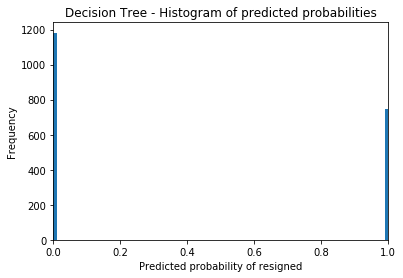

In [106]:
dtree_pred_prob = dtree.predict_proba(X_test)[:, 1]
plt.hist(dtree_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Decision Tree - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

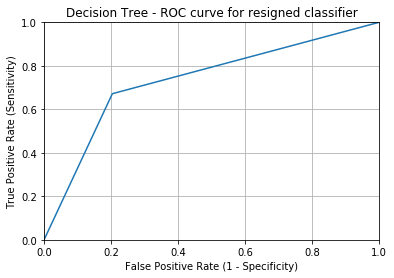

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, dtree_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Decision Tree - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [108]:
cross_val_score(dtree, X, y, cv=10, scoring='roc_auc').mean()

0.59691275478296391

## Random Forest

In [109]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86      1172
          1       0.79      0.76      0.77       759

avg / total       0.82      0.82      0.82      1931

[[1017  155]
 [ 183  576]]


Text(0,0.5,'Frequency')

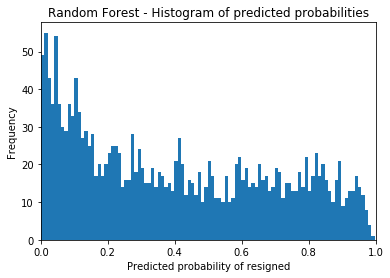

In [110]:
rfc_pred_prob = rfc.predict_proba(X_test)[:, 1]
plt.hist(rfc_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Random Forest - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

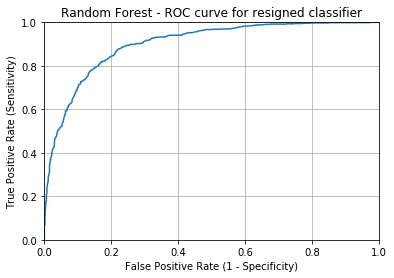

In [111]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rfc_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Random Forest - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [112]:
cross_val_score(rfc, X, y, cv=10, scoring='roc_auc').mean()

0.80355191041450524

## Logistic Regression

In [113]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

print(acc_log)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

74.45
             precision    recall  f1-score   support

          0       0.80      0.78      0.79      1172
          1       0.68      0.70      0.69       759

avg / total       0.75      0.75      0.75      1931

[[916 256]
 [227 532]]


Text(0,0.5,'Frequency')

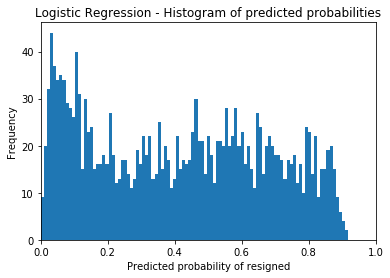

In [114]:
logreg_pred_prob = logreg.predict_proba(X_test)[:, 1]
plt.hist(logreg_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Logistic Regression - Histogram of predicted probabilities')
plt.xlabel('Predicted probability of resigned')
plt.ylabel('Frequency')

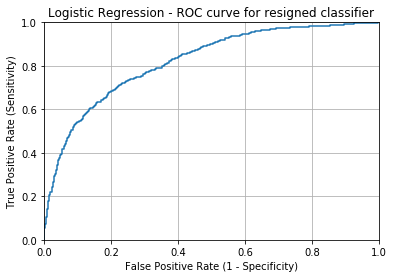

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Logistic Regression - ROC curve for resigned classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [116]:
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.82568203643357629

In [117]:
coeff_df = pd.DataFrame(MAIN.columns.delete(0))
coeff_df.columns = ['Resigned']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Resigned,Correlation
6,SUP Age at Action,1.253078
3,Age at Action,0.872808
11,Is STEM,0.569505
10,House Loan,0.269442
0,Resigned,0.263805
18,VAC_Vacation,0.139108
21,Year After Grad,0.038749
5,SUP Exp at Action,0.011300
15,VAC_Others,0.008890
12,MAX Degree,0.005830


## SVC

In [118]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)

print(acc_svc)
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

90.3
             precision    recall  f1-score   support

          0       0.78      0.85      0.82      1172
          1       0.74      0.63      0.68       759

avg / total       0.76      0.77      0.76      1931

[[1000  172]
 [ 280  479]]


In [119]:
cross_val_score(svc, X, y, cv=10, scoring='roc_auc').mean()

0.73838727956339334

# Predict

In [120]:
#Import data to be predicted
PREDICT_MASTER = pd.read_csv('TEST_JUL2018_ACTIVE.csv')

In [121]:
PREDICT = PREDICT_MASTER.copy()
                          
PREDICT

,Serial Number,BSC Indicator,Resigned,Last Action Date,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
0,357,1,0,2017-06-01,0,37.492899,59.038357,1,32.684933,58.953426,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.000000,1.000000,1.000000,1.804453,1,1,38.358906,1,-0.084932,1,0,1
1,368,0,0,2018-06-01,0,37.084950,60.126026,1,8.838356,35.438354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.000000,1.333333,1.541667,2.160377,0,0,38.194519,1,-24.687672,1,0,1
2,371,0,0,2016-01-01,0,37.249225,59.290409,1,32.767124,57.868492,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.000000,6.666667,1.297030,1,0,38.389042,1,-1.421918,1,1,0
3,378,0,0,2013-10-01,0,37.082213,57.701370,0,26.265753,46.945206,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.875000,1.000000,6.897436,1.128319,1,0,38.605480,1,-10.756165,1,1,0
4,414,0,0,2018-01-01,0,34.336092,60.126026,1,27.690411,50.369862,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.000000,0.000000,0.000000,1.875000,1,0,37.780823,1,-9.756165,1,1,0
5,428,1,0,2018-01-01,0,34.248479,56.531506,1,25.098631,52.284931,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.000000,2.000000,0.000000,1.385691,1,0,24.364384,1,-4.246575,1,1,0
6,437,0,0,2018-08-01,0,33.996591,60.038357,1,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,2.083333,0,1,34.117809,0,0.000000,0,0,0
7,445,0,0,2014-10-01,0,33.744704,55.287670,1,19.263014,53.780823,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.500000,1.000000,1.750000,1.089674,1,1,12.175343,1,-1.506849,1,0,1
8,448,1,0,2017-12-01,0,33.744704,55.950684,0,14.090411,40.191780,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.000000,0.000000,3.333333,1.210280,1,1,36.602741,1,-15.758904,1,0,1
9,449,1,0,2017-04-01,0,32.663231,55.950684,1,33.104111,56.783562,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.800000,2.000000,1.500000,1.198312,0,0,34.232876,0,0.832877,1,0,1


In [122]:
ACTUAL = PREDICT['Resigned'].copy()

ACTUAL

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2324    0
2325    0
2326    0
2327    0
2328    0
2329    0
2330    0
2331    0
2332    0
2333    0
2334    0
2335    0
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    0
2344    0
2345    0
2346    0
2347    0
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
Name: Resigned, Length: 2354, dtype: int64

In [123]:
PREDICT = PREDICT.drop('Resigned',axis=1)

PREDICT

,Serial Number,BSC Indicator,Last Action Date,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
0,357,1,2017-06-01,0,37.492899,59.038357,1,32.684933,58.953426,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.000000,1.000000,1.000000,1.804453,1,1,38.358906,1,-0.084932,1,0,1
1,368,0,2018-06-01,0,37.084950,60.126026,1,8.838356,35.438354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.000000,1.333333,1.541667,2.160377,0,0,38.194519,1,-24.687672,1,0,1
2,371,0,2016-01-01,0,37.249225,59.290409,1,32.767124,57.868492,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.000000,6.666667,1.297030,1,0,38.389042,1,-1.421918,1,1,0
3,378,0,2013-10-01,0,37.082213,57.701370,0,26.265753,46.945206,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.875000,1.000000,6.897436,1.128319,1,0,38.605480,1,-10.756165,1,1,0
4,414,0,2018-01-01,0,34.336092,60.126026,1,27.690411,50.369862,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.000000,0.000000,0.000000,1.875000,1,0,37.780823,1,-9.756165,1,1,0
5,428,1,2018-01-01,0,34.248479,56.531506,1,25.098631,52.284931,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.000000,2.000000,0.000000,1.385691,1,0,24.364384,1,-4.246575,1,1,0
6,437,0,2018-08-01,0,33.996591,60.038357,1,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,2.083333,0,1,34.117809,0,0.000000,0,0,0
7,445,0,2014-10-01,0,33.744704,55.287670,1,19.263014,53.780823,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.500000,1.000000,1.750000,1.089674,1,1,12.175343,1,-1.506849,1,0,1
8,448,1,2017-12-01,0,33.744704,55.950684,0,14.090411,40.191780,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.000000,0.000000,3.333333,1.210280,1,1,36.602741,1,-15.758904,1,0,1
9,449,1,2017-04-01,0,32.663231,55.950684,1,33.104111,56.783562,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.800000,2.000000,1.500000,1.198312,0,0,34.232876,0,0.832877,1,0,1


In [124]:
PREDICT.set_index('Serial Number', inplace=True)
PREDICT = PREDICT.drop('BSC Indicator',axis=1)

PREDICT

,Last Action Date,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,Is SUP,EDU Allowance,House Loan,Is STEM,MAX Degree,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
Serial Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
357,2017-06-01,0,37.492899,59.038357,1,32.684933,58.953426,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.000000,1.000000,1.000000,1.804453,1,1,38.358906,1,-0.084932,1,0,1
368,2018-06-01,0,37.084950,60.126026,1,8.838356,35.438354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.000000,1.333333,1.541667,2.160377,0,0,38.194519,1,-24.687672,1,0,1
371,2016-01-01,0,37.249225,59.290409,1,32.767124,57.868492,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.000000,6.666667,1.297030,1,0,38.389042,1,-1.421918,1,1,0
378,2013-10-01,0,37.082213,57.701370,0,26.265753,46.945206,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.875000,1.000000,6.897436,1.128319,1,0,38.605480,1,-10.756165,1,1,0
414,2018-01-01,0,34.336092,60.126026,1,27.690411,50.369862,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.000000,0.000000,0.000000,1.875000,1,0,37.780823,1,-9.756165,1,1,0
428,2018-01-01,0,34.248479,56.531506,1,25.098631,52.284931,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.000000,2.000000,0.000000,1.385691,1,0,24.364384,1,-4.246575,1,1,0
437,2018-08-01,0,33.996591,60.038357,1,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,2.083333,0,1,34.117809,0,0.000000,0,0,0
445,2014-10-01,0,33.744704,55.287670,1,19.263014,53.780823,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.500000,1.000000,1.750000,1.089674,1,1,12.175343,1,-1.506849,1,0,1
448,2017-12-01,0,33.744704,55.950684,0,14.090411,40.191780,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.000000,0.000000,3.333333,1.210280,1,1,36.602741,1,-15.758904,1,0,1


In [125]:
PREDICT = PREDICT.drop('Last Action Date',axis=1)

In [126]:
PREDICT.dtypes

Is Re-Entry                 int64
Exp at Action             float64
Age at Action             float64
Is MPT                      int64
SUP Exp at Action         float64
SUP Age at Action         float64
SUP Is MPT                float64
Is SUP                    float64
EDU Allowance             float64
House Loan                float64
Is STEM                   float64
MAX Degree                float64
VAC_DependentCare         float64
VAC_Maternity             float64
VAC_Others                float64
VAC_Personal              float64
VAC_Sick                  float64
VAC_Vacation              float64
Is EMP_SUP Same Gender      int64
EMP Gender                  int64
Year After Grad           float64
SUP Older Than EMP          int64
Age Diff SUPvsEMP         float64
Has SUP                     int64
Is SUP Male                 int64
Is SUP Female               int64
dtype: object

In [127]:
#Decision Tree
dtree_pred = dtree.predict(PREDICT)

dtree_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [128]:
dtree_pred_prob = dtree.predict_proba(PREDICT)#[:, 1]

dtree_pred_prob

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [129]:
#Random Forest
rfc_pred = rfc.predict(PREDICT)

rfc_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [130]:
rfc_pred_prob = rfc.predict_proba(PREDICT)#[:, 1]

rfc_pred_prob

array([[ 0.94 ,  0.06 ],
       [ 0.99 ,  0.01 ],
       [ 0.965,  0.035],
       ..., 
       [ 0.185,  0.815],
       [ 0.23 ,  0.77 ],
       [ 0.35 ,  0.65 ]])

In [131]:
rfc_result = pd.DataFrame({'Predicted':rfc_pred})

rfc_result #= rfc_pred+rfc_pred_prob

,Predicted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [132]:
rfc_prob = pd.DataFrame({'Propability':rfc_pred_prob[:, 1]})

rfc_prob #= rfc_pred+rfc_pred_prob

,Propability
0,0.0600
1,0.0100
2,0.0350
3,0.0050
4,0.0050
5,0.0500
6,0.0350
7,0.0350
8,0.0025
9,0.0175


In [133]:
rfc_result.loc[:, 'Propability'] = rfc_prob['Propability']
rfc_result

,Predicted,Propability
0,0,0.0600
1,0,0.0100
2,0,0.0350
3,0,0.0050
4,0,0.0050
5,0,0.0500
6,0,0.0350
7,0,0.0350
8,0,0.0025
9,0,0.0175


In [134]:
rfc_actual = pd.DataFrame(ACTUAL)


In [135]:
rfc_actual

,Resigned
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [136]:
rfc_result.loc[:, 'Actual'] = rfc_actual['Resigned']
rfc_result

,Predicted,Propability,Actual
0,0,0.0600,0
1,0,0.0100,0
2,0,0.0350,0
3,0,0.0050,0
4,0,0.0050,0
5,0,0.0500,0
6,0,0.0350,0
7,0,0.0350,0
8,0,0.0025,0
9,0,0.0175,0


In [137]:
rfc_result.loc[:, 'Serial Number'] = rfc_result.index + 1

rfc_result.set_index('Serial Number', inplace=True)

In [138]:
rfc_result.to_csv('PREDICTED_JUL2018_FULL.csv')

In [139]:
print(classification_report(ACTUAL,rfc_pred))
print(confusion_matrix(ACTUAL,rfc_pred))

             precision    recall  f1-score   support

          0       0.96      0.82      0.88      2267
          1       0.04      0.18      0.06        87

avg / total       0.93      0.79      0.85      2354

[[1855  412]
 [  71   16]]
